In [26]:
%matplotlib inline

import numpy as np
from matplotlib.patches import Ellipse
from scipy.constants import c
from scipy.constants import pi
from scipy.optimize import minimize
from scipy.stats import chi2
from matplotlib import pyplot as plt

f = 2.4e9
np.random.seed(100)

Functions

In [4]:
def get_transmission_power(Pt, r): 
    Pr = Pt + 20 * np.log10(c / (4 * pi * f * r)) 
    return Pr

def get_transmission_power_coords(Pt, router_pos, wifi_pos):
    r = ((router_pos[0] - wifi_pos[0]) ** 2 + (router_pos[1] - wifi_pos[1]) ** 2 + (router_pos[2] - wifi_pos[2]) ** 2) ** 0.5 
    return get_transmission_power(Pt, r)

def get_distance(Pt, Pr):
    r = c / (10 ** ((Pr - Pt) / 20.0) * 4 * pi * f)
    return r

# 0.2 Signal strength and distance

## a)

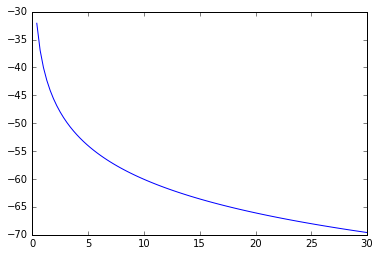

In [27]:
rs = np.linspace(0.4, 30, 100)
plt.plot(rs, get_transmission_power(0, rs))
plt.show()

## b)

$ P_r = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f r} \right) $

$ r = \frac{c}{4\pi f} 10^{-\frac{P_r - P_t}{20}} $

## c)

In [6]:
print("Distance between -30 and -31 dBm is %f m" % (get_distance(0, -31) - get_distance(0, -30)))
print("Distance between -60 and -61 dBm is %f m" % (get_distance(0, -61) - get_distance(0, -60)))

Distance between -30 and -31 dBm is 0.038355 m
Distance between -60 and -61 dBm is 1.212900 m


## d)

This is because the signal strength from a point source decays as $r^{-2}$.

# 0.3 Position reconstruction

## e)

<img src="exampleA.png">

## f)

$ P_r = P_t + 20 \times ^{10}\log\left( \frac{c}{4 \pi f r} \right)$

$ P_r = P_t + 20 \times ^{10}\log\left( \frac{c}{4 \pi f} \right) - 20 \times ^{10}\log\left( r \right)$

$r = ((x - x_i)^2 + (y - y_i)^2 + Z^2)^{\frac{1}{2}}$

$P(x ,y) = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f}\right) - \frac{1}{2} \times 20 \times ^{10}\log ((x - x_i)^2 + (y - y_i)^2 + Z^2)$

$P(x ,y) = P_t + 20 \times ^{10}\log \left( \frac{c}{4\pi f}\right) - 10 \times ^{10}\log ((x - x_i)^2 + (y - y_i)^2 + Z^2)$

## g)

Mean is 0.0168 and std is 1.0458


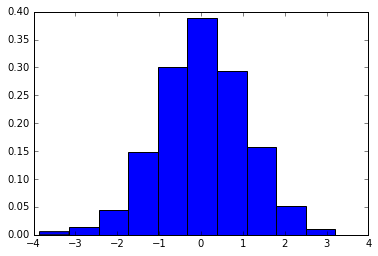

In [7]:
Pt = np.zeros(1000)
r = 404 ** 0.5 
Pr = get_transmission_power(Pt, r) + np.random.randn(1000)

normalized_residual = get_transmission_power(Pt, r) - Pr
plt.hist(normalized_residual, normed=True)

mean = np.mean(normalized_residual)
std = np.std(normalized_residual)

print("Mean is %.4f and std is %.4f" % (mean, std))

## h)

Mean is -0.0177 and std is 2.0129
The standard deviation will be too big, or too small respectively.


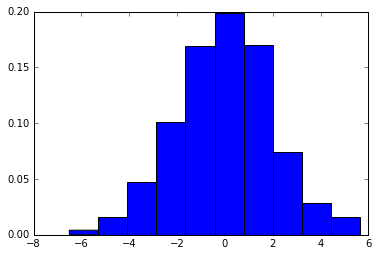

In [8]:
Pt = np.zeros(1000)
r = 404 ** 0.5 
Pr = get_transmission_power(Pt, r) + np.random.normal(0, 2, 1000)

normalized_residual = get_transmission_power(Pt, r) - Pr
plt.hist(normalized_residual, normed=True)

mean = np.mean(normalized_residual)
std = np.std(normalized_residual)

print("Mean is %.4f and std is %.4f" % (mean, std))
print("The standard deviation will be too big, or too small respectively.")

## i)

Mean is 16.9359 and std is 0.9945
The mean has shifted.


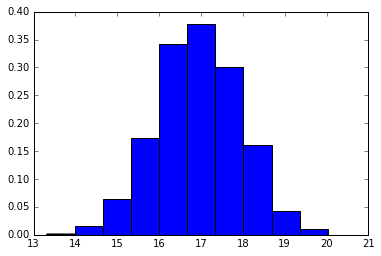

In [9]:
Pt = np.zeros(1000)
r = (25 * 25 + 2 * 2) ** 0.5 
Pr = Pt + 25 * np.log10(c / (4 * pi * f * r)) + np.random.normal(0, 1, 1000)

normalized_residual = get_transmission_power(Pt, r) - Pr
plt.hist(normalized_residual, normed=True)

mean = np.mean(normalized_residual)
std = np.std(normalized_residual)

print("Mean is %.4f and std is %.4f" % (mean, std))
print("The mean has shifted.")

## j)

You want to see the mean around 0, indicating no systematic error. And the standard deviation as 1, to indicate that your estimate of it was correct.

# 0.4 Toy Monte Carlo

## k)

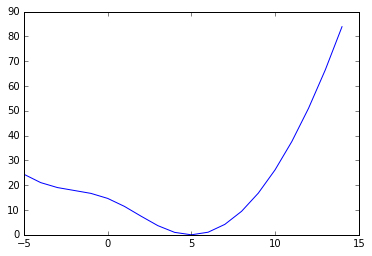

In [28]:
routers = [(0, 0, 3), (0, 20, 3), (20, 0, 3), (20, 20, 3)]
device_position = (5, 5, 1)
Pt = 0

chi_squareds = []
for x in range(-5, 15):
    estimated_position = [x, 5, 1]
    total = 0
    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position)
        Pr = get_transmission_power_coords(Pt, router, estimated_position)
        total += (Si - Pr) ** 2
    chi_squareds.append(total)

plt.plot(np.arange(-5, 15), chi_squareds)
plt.show()

## l)

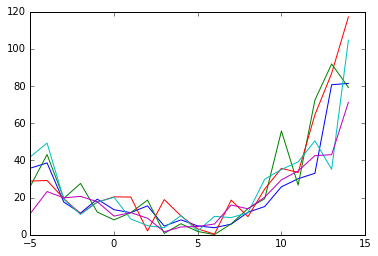

In [11]:
for i in range(5):
    chi_squareds = []
    for x in range(-5, 15):
        estimated_position = [x, 5, 1]
        total = 0
        for router in routers:
            Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
            Pr = get_transmission_power_coords(Pt, router, estimated_position)
            total += (Si - Pr) ** 2
        chi_squareds.append(total)

    plt.plot(np.arange(-5, 15), chi_squareds)

## m)

In [12]:
def get_chi_squared(pos_est):
    estimated_position = [pos_est[0], pos_est[1], 1]
    total = 0
    for i, router in enumerate(routers):
        Si = S[i]
        Pr = get_transmission_power_coords(Pt, router, estimated_position)
        total += (Si - Pr) ** 2
    return total


S = []
for router in routers:
    Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
    S.append(Si)
x0 = np.array([10.0, 10.0])
# check_grad_result = check_grad(get_chi_squared, get_chi_squared_grad, x0)
# print(check_grad_result)
result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
print('Minimum of x is %f, and y is %f' % (result['x'][0], result['x'][1]))

Minimum of x is 5.342701, and y is 5.237551


## n) and o)

Mean of (x,y): (4.86,4.95), mean of chi squared: 1.96
So the mean of chi squared agrees with 2 degrees of freedom.


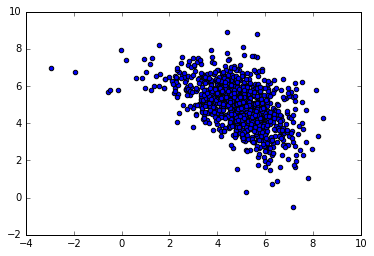

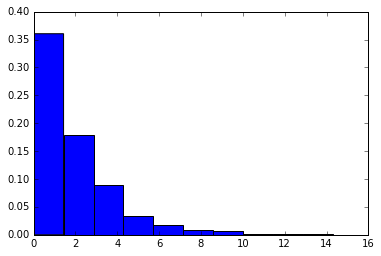

In [13]:
positions = []
Xs = []
for i in range(1000):
    S = []
    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
        S.append(Si)
    x0 = np.array([10.0, 10.0])
    # check_grad_result = check_grad(get_chi_squared, get_chi_squared_grad, x0)
    # print(check_grad_result)
    result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
    positions.append(result.x)
    Xs.append(get_chi_squared(result.x))

positions = np.array(positions)
Xs = np.array(Xs)

mean_pos = positions.mean(axis=0)
mean_chi_square = Xs.mean()
print("Mean of (x,y): (%.2f,%.2f), mean of chi squared: %.2f" % (mean_pos[0], mean_pos[1], mean_chi_square))
print("So the mean of chi squared agrees with 2 degrees of freedom.")

plt.clf()
plt.scatter(positions[:, 0], positions[:, 1])
plt.show()
plt.clf()
plt.hist(Xs, normed=True)
plt.show()


## p)

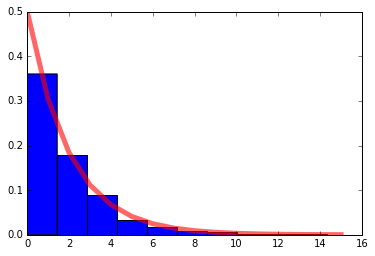

In [14]:
df = 2
plt.plot(chi2.pdf(np.arange(16), df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.hist(Xs, normed=True)
plt.show()


## q)

Mean of (x,y): (4.61,4.36), mean of chi squared: 7.12


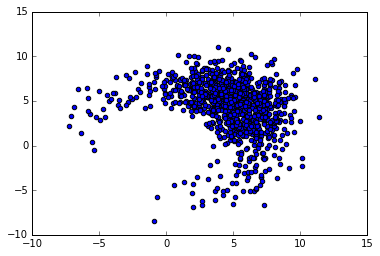

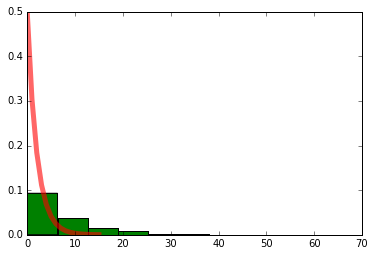

In [15]:
positions = []
Xs = []
for i in range(1000):
    S = []
    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 2)
        S.append(Si)
    x0 = np.array([10.0, 10.0])
    # check_grad_result = check_grad(get_chi_squared, get_chi_squared_grad, x0)
    # print(check_grad_result)
    result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
    positions.append(result.x)
    Xs.append(get_chi_squared(result.x))

positions = np.array(positions)
Xs = np.array(Xs)

mean_pos = positions.mean(axis=0)
mean_chi_square = Xs.mean()
print("Mean of (x,y): (%.2f,%.2f), mean of chi squared: %.2f" % (mean_pos[0], mean_pos[1], mean_chi_square))

plt.clf()
plt.scatter(positions[:, 0], positions[:, 1])
plt.show()
plt.clf()
plt.hist(Xs, normed=True)
df = 2
plt.plot(chi2.pdf(np.arange(16), df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.hist(Xs, normed=True)
plt.show()

The average of the minized positions is still close to (5, 5), but the spread is much bigger. The chi-squared mean also doesn't equal the 2 degrees of freedom anymore, meaning the histogram doesn't follow the correct chi-squared curve anymore either.

## r)

It means we underestimated the error by a factor 2.

# 0.5 Error on fit parameters

## s)

$\chi^2 = \sum_i \frac{S_i^2 - 2S_i P(x_0,y_0) - 2S_i \frac{\partial P(x_0,y_0)}{\partial x}(x-x_0) - 2S_i \frac{\partial P(x_0,y_0)}{\partial y}(y-y_0) + P(x_0, y_0)^2 + 2P(x_0, y_0)\frac{\partial P(x_0,y_0)}{\partial x}(x-x_0) + 2P(x_0, y_0)\frac{\partial P(x_0,y_0)}{\partial y}(y-y_0) + (\frac{\partial P(x_0,y_0)}{\partial x}(x-x_0))^2 + 2 \frac{\partial P(x_0,y_0)}{\partial x}(x-x_0)\frac{\partial P(x_0,y_0)}{\partial y}(y-y_0) + (\frac{\partial P(x_0,y_0)}{\partial x}(x-x_0))^2}{\sigma_i^2}$

## t)

$ \chi^2 = \sum_i \frac{S_i^2 - 2S_i P(x_0,y_0) + P(x_0,y_0)^2 + (\frac{\partial P(x_0,y_0)}{\partial x}(x-x_0))^2 + (\frac{\partial P(x_0,y_0)}{\partial y}(y-y_0))^2 + 2 \frac{\partial P(x_0,y_0)}{\partial x}(x-x_0)\frac{\partial P(x_0,y_0)}{\partial y}(y-y_0)}  {\sigma_i^2}$

## u)

$A = S_i^2 - 2S_i P(x_0,y_0) + P(x_0,y_0)^2 $

$B_{11} = \left(\frac{\partial P(x_0,y_0)}{\partial x}\right)^2 $
$B_{12} = \frac{\partial P(x_0,y_0)}{\partial x}\frac{\partial P(x_0,y_0)}{\partial y} $

$B_{21} = \frac{\partial P(x_0,y_0)}{\partial x}\frac{\partial P(x_0,y_0)}{\partial y} $
$B_{22} = \left(\frac{\partial P(x_0,y_0)}{\partial y}\right)^2 $

## v)

We have to solve the equation

$ \chi^2(0, \Delta y) + 1 = \chi^2(\Delta x, \Delta y)$.

Which we solve for $\Delta x$ to find how much it has to change for $\chi^2$ to change by 1. The value of $\Delta x$ will be maximum when $\Delta y = 0$. Solving this results in:

$ \Delta x^2 = \left( \frac{\partial P}{\partial x} \right)^{-2}$

Likewise for $\Delta y$:

$\Delta y^2 = \left( \frac{\partial P}{\partial y} \right)^{-2}$

## w)

Estimate (x,y): (4.65,5.63), chi squared: 0.18
Variance is (0.8573, 1.1284)
Standard deviation is (0.9259, 1.0623)


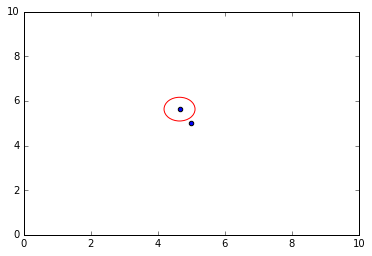

In [20]:
S = []
for router in routers:
    Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
    S.append(Si)
x0 = np.array([10.0, 10.0])
# check_grad_result = check_grad(get_chi_squared, get_chi_squared_grad, x0)
# print(check_grad_result)
result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
(x, y) = result.x
Xs = (get_chi_squared(result.x))
print("Estimate (x,y): (%.2f,%.2f), chi squared: %.2f" % (x, y, Xs))

x_variance = 0
y_variance = 0
for router in routers:
    x_variance += (-20.0 * (x - router[0]) / (
        np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2
    y_variance += (-20.0 * (y - router[1]) / (
        np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2

print("Variance is (%.4f, %.4f)" % (x_variance, y_variance))
print("Standard deviation is (%.4f, %.4f)" % (x_variance ** 0.5, y_variance ** 0.5))

plt.clf()
ax = plt.subplot()
plt.scatter(device_position[0], device_position[1])
plt.scatter(x, y)
ell = Ellipse(xy=(x, y),
              width=x_variance ** 0.5, height=y_variance ** 0.5,
              angle=0, color='red')
ell.set_facecolor('none')
ax.add_artist(ell)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.show()


## y)

Mean of (x,y): (4.97,4.85), mean of chi squared: 1.97, mean of standard deviations: (1.02, 1.01)


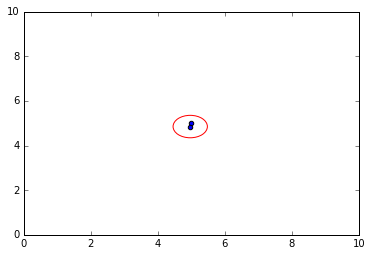

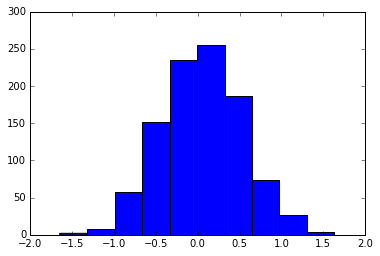

Mean of normalized residuals: 0.0566, standard deviation: 0.4830
The standard deviation is lower because we're using multiple routers to estimate the final position. Thus the error of each router gets averaged away.


In [23]:
positions = []
Xs = []
variances = []
normalized_residuals = []
for i in range(1000):
    S = []
    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
        S.append(Si)
    x0 = np.array([10.0, 10.0])
    # check_grad_result = check_grad(get_chi_squared, get_chi_squared_grad, x0)
    # print(check_grad_result)
    result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
    (x, y) = result.x
    positions.append(result.x)
    Xs.append(get_chi_squared(result.x))
    # print("Estimate (x,y): (%.2f,%.2f), chi squared: %.2f" % (x, y, Xs))

    x_variance = 0
    y_variance = 0
    for router in routers:
        x_variance += (-20.0 * (x - router[0]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2
        y_variance += (-20.0 * (y - router[1]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2

    variances.append((x_variance, y_variance))

    normalized_residual = 0
    for i, router in enumerate(routers):
        normalized_residual += S[i] - get_transmission_power_coords(Pt, router, (x, y, device_position[2]))
    normalized_residual /= len(routers)
    normalized_residuals.append(normalized_residual)

positions = np.array(positions)
Xs = np.array(Xs)
variances = np.array(variances)
normalized_residuals = np.array(normalized_residuals)

mean_pos = positions.mean(axis=0)
mean_variance = variances.mean(axis=0)
mean_chi_square = Xs.mean()
print("Mean of (x,y): (%.2f,%.2f), mean of chi squared: %.2f, mean of standard deviations: (%.2f, %.2f)" % (
    mean_pos[0], mean_pos[1], mean_chi_square, mean_variance[0] ** 0.5, mean_variance[1] ** 0.5))

plt.clf()
ax = plt.subplot()
plt.scatter(device_position[0], device_position[1])
plt.scatter(mean_pos[0], mean_pos[1])
ell = Ellipse(xy=(mean_pos[0], mean_pos[1]),
              width=mean_variance[0] ** 0.5, height=mean_variance[1] ** 0.5,
              angle=0, color='red')
ell.set_facecolor('none')
ax.add_artist(ell)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.show()

plt.clf()
plt.hist(normalized_residuals)
plt.show()
print("Mean of normalized residuals: %.4f, standard deviation: %.4f" % (
np.mean(normalized_residuals), np.std(normalized_residuals)))
print("The standard deviation is lower because we're using multiple \
routers to estimate the final position. Thus the error of each router \
gets averaged away.")

## z)

Mean of (x,y): (4.90,4.92), mean of chi squared: 1.97, mean of standard deviations: (1.01, 1.02)


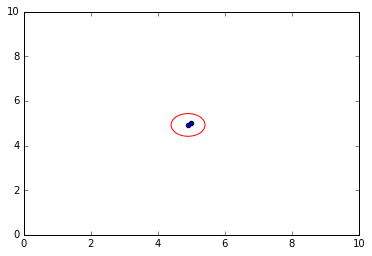

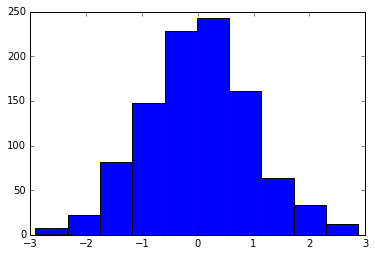

Mean of normalized residuals: 0.0172, standard deviation: 0.9483
The standard deviation doubles.


In [25]:
positions = []
Xs = []
variances = []
normalized_residuals = []
for i in range(1000):
    S = []
    for router in routers:
        Si = get_transmission_power_coords(Pt, router, device_position) + np.random.normal(0, 1)
        S.append(Si)
    x0 = np.array([10.0, 10.0])
    # check_grad_result = check_grad(get_chi_squared, get_chi_squared_grad, x0)
    # print(check_grad_result)
    result = minimize(get_chi_squared, x0, method="L-BFGS-B", jac=False, options={'maxiter': 1000})
    (x, y) = result.x
    positions.append(result.x)
    Xs.append(get_chi_squared(result.x))
    # print("Estimate (x,y): (%.2f,%.2f), chi squared: %.2f" % (x, y, Xs))

    x_variance = 0
    y_variance = 0
    for router in routers:
        x_variance += (-20.0 * (x - router[0]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2
        y_variance += (-20.0 * (y - router[1]) / (
            np.log(10) * ((x - router[0]) ** 2 + (y - router[1]) ** 2 + (device_position[2] - router[2]) ** 2))) ** 2

    variances.append((x_variance, y_variance))

    normalized_residual = 0
    for i, router in enumerate(routers):
        normalized_residual += S[i] - get_transmission_power_coords(Pt, router, (x, y, device_position[2]))
    normalized_residual /= len(routers)
    normalized_residuals.append(normalized_residual)

positions = np.array(positions)
Xs = np.array(Xs)
variances = np.array(variances)
normalized_residuals = np.array(normalized_residuals) * 2

mean_pos = positions.mean(axis=0)
mean_variance = variances.mean(axis=0)
mean_chi_square = Xs.mean()
print("Mean of (x,y): (%.2f,%.2f), mean of chi squared: %.2f, mean of standard deviations: (%.2f, %.2f)" % (
    mean_pos[0], mean_pos[1], mean_chi_square, mean_variance[0] ** 0.5, mean_variance[1] ** 0.5))

plt.clf()
ax = plt.subplot()
plt.scatter(device_position[0], device_position[1])
plt.scatter(mean_pos[0], mean_pos[1])
ell = Ellipse(xy=(mean_pos[0], mean_pos[1]),
              width=mean_variance[0] ** 0.5, height=mean_variance[1] ** 0.5,
              angle=0, color='red')
ell.set_facecolor('none')
ax.add_artist(ell)
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.show()

plt.clf()
plt.hist(normalized_residuals)
plt.show()
print("Mean of normalized residuals: %.4f, standard deviation: %.4f" % (
    np.mean(normalized_residuals), np.std(normalized_residuals)))
print("The standard deviation doubles.")